In [9]:
import tensorflow as tf
tf.__version__

'2.20.0'

In [10]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# MNIST data Load

In [5]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

In [6]:
X_train = X_train.reshape(-1, 28, 28, 1)/255.0
X_test = X_test.reshape(-1, 28, 28, 1)/255.0
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

# 합성곱 신경망의 구조
이미지

In [16]:
from tensorflow.keras import Sequential,layers

model = Sequential(
    [
    layers.Input(shape=(28,28,1)), # 3차원 이미지 1장의 입력
    # 첫번째 층
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(), # default (2,2)
    layers.Dropout(0.1),
    # 두번째 층
    layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'), #분류 계층
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax') #출력 계층
    ]
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# 모델 설정
model.compile(loss='sparse_categorical_crossentropy', # 손실함수
              optimizer='adam', # 옵티마이저
              metrics=['accuracy'] # 평가항목
              )

In [11]:
# 모델 학습
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10


2025-09-02 15:24:47.253837: I external/local_xla/xla/service/service.cc:163] XLA service 0x7faffc004b40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-09-02 15:24:47.253861: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-09-02 15:24:47.270767: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-09-02 15:24:47.378591: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91200


 54/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4017 - loss: 1.7290

I0000 00:00:1756794290.921157   24899 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8905 - loss: 0.3508
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9653 - loss: 0.1186
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9732 - loss: 0.0888
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9789 - loss: 0.0723
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9813 - loss: 0.0634
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9817 - loss: 0.0584
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9845 - loss: 0.0528
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9856 - loss: 0.0472
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9866 - loss: 0.0441
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9863 - loss: 0.0424


In [13]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss : {loss:.4f}, Accuracy : {accuracy:.4f}")

Loss : 0.0244, Accuracy : 0.9915


---

# RESNET 활용하기

In [17]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import decode_predictions
import numpy as np

model = ResNet50(weights='imagenet') # 첫 실행 시 가중치 다운로드됨
model.summary()

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

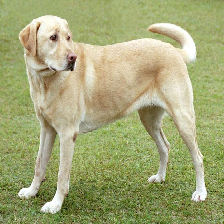

In [19]:
from tensorflow.keras.preprocessing import image

img = image.load_img('YellowLabradorLooking_new.jpg',target_size=(224, 224))
img

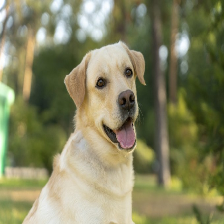

In [21]:
from tensorflow.keras.preprocessing import image

img2 = image.load_img('test_dog.jpg',target_size=(224, 224))
img2

In [20]:
from tensorflow.keras.applications.resnet50 import decode_predictions
import numpy as np

x = image.img_to_array(img) # x.shape=(224,224,3)
x = np.expand_dims(x, axis=0) # x.shape=(1,244,244,3)
pred = model.predict(x, verbose=0)
print('Predicted:', decode_predictions(pred, top=3))

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Predicted: [[('n02099712', 'Labrador_retriever', np.float32(0.26892528)), ('n02108089', 'boxer', np.float32(0.15150161)), ('n02099849', 'Chesapeake_Bay_retriever', np.float32(0.10756052))]]


In [22]:
from tensorflow.keras.applications.resnet50 import decode_predictions
import numpy as np

x = image.img_to_array(img2) # x.shape=(224,224,3)
x = np.expand_dims(x, axis=0) # x.shape=(1,244,244,3)
pred = model.predict(x, verbose=0)
print('Predicted:', decode_predictions(pred, top=3))

Predicted: [[('n02099712', 'Labrador_retriever', np.float32(0.7236505)), ('n02109047', 'Great_Dane', np.float32(0.05413747)), ('n02108089', 'boxer', np.float32(0.026411584))]]


## 분류모델 추가하기

In [1]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

res_model = ResNet50(weights='imagenet', input_shape=(224, 224, 3), include_top=False)
res_model.trainable = True

model=Sequential()
model.add(res_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

2025-09-02 16:31:17.900445: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
I0000 00:00:1756798279.448863   19919 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │   102,761,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,352,259 (482.00 MB)

 Trainable params: 126,299,139 (481.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [2]:
import zipfile
file_path = 'glaucoma.zip' # 업로드한 zip 파일의 이름으로 변경
# zip 파일 압축 해제
with zipfile.ZipFile(file_path, 'r') as f:
    f.extractall('./datasets') 

In [3]:
# 데이터셋 생성
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.2, height_shift_range=0.2,
                               horizontal_flip=True)
train_data = train_gen.flow_from_directory('./datasets/glaucoma/train', target_size=(224,224),
                                           batch_size=32, class_mode='sparse')

test_gen = ImageDataGenerator()
test_data = test_gen.flow_from_directory('./datasets/glaucoma/test', target_size=(224,224),
                                         batch_size=32, class_mode='sparse')

Found 1394 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [5]:
# 훈련 정의 및 학습
import scipy 
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
metrics=['accuracy'])
model.fit(train_data, validation_data=test_data, epochs=20)

Epoch 1/20


2025-09-02 16:32:41.736141: I external/local_xla/xla/service/service.cc:163] XLA service 0x7f35ec005290 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-09-02 16:32:41.736165: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-09-02 16:33:01.595678: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-09-02 16:35:56.661435: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91200
I0000 00:00:1756798575.141880   19993 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


40/44 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.6121 - loss: 27.4343

2025-09-02 16:36:26.982340: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_16168', 4 bytes spill stores, 4 bytes spill loads

2025-09-02 16:36:27.252351: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_16038', 56 bytes spill stores, 56 bytes spill loads



44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 611ms/step - accuracy: 0.6180 - loss: 25.7512

/home/devuser/miniconda3/envs/tf_cuda_env/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-09-02 16:36:46.497679: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1712', 56 bytes spill stores, 56 bytes spill loads



44/44 ━━━━━━━━━━━━━━━━━━━━ 270s 775ms/step - accuracy: 0.6765 - loss: 8.8241 - val_accuracy: 0.5200 - val_loss: 3221793.7500
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 200ms/step - accuracy: 0.6930 - loss: 1.8073 - val_accuracy: 0.5067 - val_loss: 13773.6504
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 199ms/step - accuracy: 0.6758 - loss: 1.1228 - val_accuracy: 0.5267 - val_loss: 11495.7266
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 18s 405ms/step - accuracy: 0.6973 - loss: 0.6995 - val_accuracy: 0.6600 - val_loss: 0.8043
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.7044 - loss: 0.6617 - val_accuracy: 0.6867 - val_loss: 3.1363
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 31s 707ms/step - accuracy: 0.6987 - loss: 0.6541 - val_accuracy: 0.6467 - val_loss: 0.7127
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 235ms/step - accuracy: 0.7181 - loss: 0.7575 - val_accuracy: 0.6000 - val_loss: 0.8199
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 200ms/step - accuracy: 0.7123 - loss: 0.6844 - val_accura

In [14]:
# 테스트 데이터 로드
from tensorflow.keras.preprocessing import image

img = image.load_img('test.png', target_size=(224,224))
x = image.img_to_array(img).reshape(-1, 224, 224, 3)
pred = model.predict(x)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.6178518  0.22685309 0.15529509]]


In [18]:
import numpy as np
from tensorflow.keras.applications.resnet50 import decode_predictions

x = image.img_to_array(img).reshape(-1, 224, 224, 3)
# x = np.expand_dims(x, axis=0)
pred = model.predict(x, verbose=0)
pred

array([[0.6178518 , 0.22685309, 0.15529509]], dtype=float32)